## Project Name - **Bank Churn Analysis**




# **Project Summary -**

This dataset contains information on bank customers, with key attributes such as Customer ID, Surname, Credit Score, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and Exited. The goal of the project is likely to analyze customer churn, which is indicated by the 'Exited' variable (1 for customers who left, 0 for those who continue).

The project's primary objective could be to build a predictive model to identify factors influencing customer churn. This involves exploring correlations between variables, such as credit score, age, and product usage, to understand patterns associated with customer departure. Feature engineering may be crucial in extracting meaningful insights.

The predictive model could utilize machine learning algorithms, possibly logistic regression or decision trees, to forecast potential churn based on customer characteristics. Feature importance analysis could highlight critical factors affecting customer retention.

Additionally, data visualization techniques may be employed to present key findings, enhancing interpretability for stakeholders. By understanding the dynamics influencing customer retention, the bank can implement targeted strategies to mitigate churn and enhance overall customer satisfaction.

**Featurs and description,**

1. **Customer ID:** A unique identifier for each customer, facilitating individual customer tracking.

2. **Surname:** The customer's last name or surname, offering personal identification.

3. **Credit Score:** A numerical value representing the customer's creditworthiness, aiding in risk assessment.

4. **Geography:** The country where the customer resides (France, Spain, or Germany), providing regional insights.

5. **Gender:** The customer's gender (Male or Female), allowing for gender-based analysis.

6. **Age:** The customer's age, a key demographic variable affecting financial behavior.

7. **Tenure:** The number of years the customer has been with the bank, indicating loyalty and potential long-term relationships.

8. **Balance:** The customer's account balance, reflecting financial health and engagement with the bank.

9. **NumOfProducts:** The number of bank products the customer uses, indicating the extent of their relationship with the bank.

10. **HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no), influencing spending and payment behavior.

11. **IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no), reflecting engagement with the bank's services.

12. **EstimatedSalary:** The estimated salary of the customer, providing insights into their financial capacity.

13. **Exited:** Whether the customer has churned (1 = yes, 0 = no), the target variable indicating customer retention or attrition.

# **Problem Statement**

**The project aims to address the challenge of customer churn in the banking sector by leveraging a dataset encompassing diverse customer attributes. The problem at hand is to develop a predictive model that can accurately identify and understand the factors contributing to customer departure from the bank. By exploring variables such as credit score, age, tenure, and product usage, the objective is to discern patterns associated with churn and create actionable insights for strategic decision-making. The project seeks to answer critical questions, including which features most strongly correlate with customer attrition, and how these insights can be translated into targeted retention strategies. Ultimately, the goal is to empower the bank with a predictive tool that enhances its ability to proactively address churn, thereby fostering customer loyalty and optimizing overall business performance.**

## Knowing data and variable in dataset

In [3]:
# Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/DataSets/Bank - Binary Classification/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DataSets/Bank - Binary Classification/test.csv')
churn_data = pd.read_csv('/content/drive/MyDrive/DataSets/Bank - Binary Classification/Churn_Modelling.csv')

In [5]:
df=pd.concat([train_df,test_df],ignore_index=True)

In [6]:
train_df.shape

(165034, 14)

In [7]:
test_df.shape

(110023, 13)

In [8]:
churn_data.shape

(10002, 14)

In [9]:
df.shape

(275057, 14)

**In the shared data, we have two CSVs: 'train.csv' and 'test.csv.' 'train.csv' comprises 14 columns, while 'test.csv' has 13. Notably, 'train.csv' includes an additional column, 'Exited,' which serves as our target variable. Naturally, the target variable is absent in 'test.csv.**

**To get more data will concat with train_df and test_df.**

### **Will check for Duplicate and null value for each CSV**

In [10]:
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
train_df.duplicated().sum()

0

In [12]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


**In train_df no any null and duplicated value present.**


In [13]:
test_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [14]:
test_df.duplicated().sum()

0

In [15]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


**In test_df no any null and duplicated value present.**


In [16]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
churn_data.dropna(inplace=True)

In [18]:
churn_data.duplicated().sum()

2

In [19]:
churn_data.drop_duplicates(inplace=True)

In [20]:
churn_data.shape

(9996, 14)

In [21]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


## **In above we treated for Null and duplicated values from above datasets.**

Now will do EDA on concated data that is on 'df' dataframe

<Axes: >

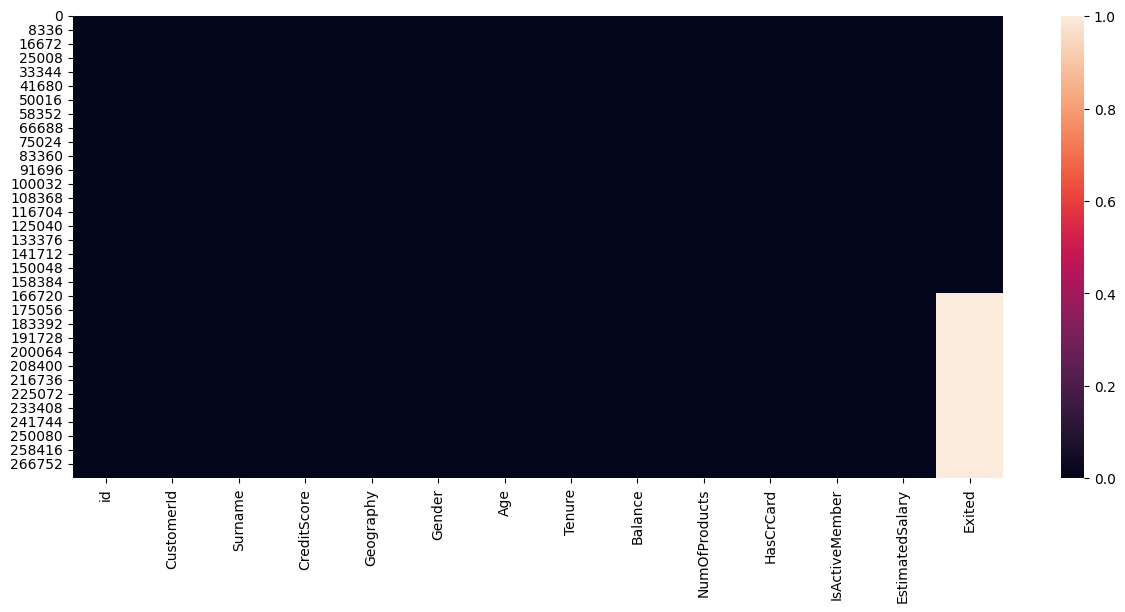

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

In [23]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275057 entries, 0 to 275056
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               275057 non-null  int64  
 1   CustomerId       275057 non-null  int64  
 2   Surname          275057 non-null  object 
 3   CreditScore      275057 non-null  int64  
 4   Geography        275057 non-null  object 
 5   Gender           275057 non-null  object 
 6   Age              275057 non-null  float64
 7   Tenure           275057 non-null  int64  
 8   Balance          275057 non-null  float64
 9   NumOfProducts    275057 non-null  int64  
 10  HasCrCard        275057 non-null  float64
 11  IsActiveMember   275057 non-null  float64
 12  EstimatedSalary  275057 non-null  float64
 13  Exited           165034 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 29.4+ MB


**This DataFrame summary provides information about a dataset with 275,057 entries and 14 columns**
 - The dataset contains columns with three different data types: float64, int64, and object.
 - The 'Exited' column has 165,034 non-null values, indicating the presence of missing values for this target variable.
 - Descriptive statistics (mean, min, max) for numerical features reveal insights into the distribution and range of values.
 - Unique values in categorical columns ('Surname,' 'Geography,' 'Gender') can be explored to understand the diversity and distribution.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,275057.0,1.375280e+05,79402.260834,0.00,68764.0,137528.00,206292.00,275056.00
CustomerId,275057.0,1.569204e+07,71512.708935,15565701.00,15632999.0,15690169.00,15756875.00,15815690.00
CreditScore,275057.0,6.564849e+02,80.188100,350.00,597.0,659.00,710.00,850.00
Age,275057.0,3.812441e+01,8.864927,18.00,32.0,37.00,42.00,92.00
Tenure,275057.0,5.010867e+00,2.806173,0.00,3.0,5.00,7.00,10.00
Balance,275057.0,5.542030e+04,62805.933171,0.00,0.0,0.00,120037.96,250898.09
NumOfProducts,275057.0,1.554002e+00,0.546178,1.00,1.0,2.00,2.00,4.00
HasCrCard,275057.0,7.535893e-01,0.430921,0.00,1.0,1.00,1.00,1.00
IsActiveMember,275057.0,4.967552e-01,0.499990,0.00,0.0,0.00,1.00,1.00
EstimatedSalary,275057.0,1.124710e+05,50286.608747,11.58,74580.8,117848.09,154871.13,199992.48


**The provided summary statistics offer insights into the distribution and characteristics of the dataset**
 - Credit Score: The average credit score is around 656, with a minimum of 350 and a maximum of 850. This indicates a diverse range of credit scores among customers.
 - Age: The average age is approximately 38 years, with a minimum of 18 and a maximum of 92. The majority of customers fall within the 32 to 42 age range.
 - Tenure: The average tenure with the bank is around 5 years, ranging from 0 to 10. This suggests a relatively stable customer base, with some having long-term relationships with the bank.
 - Balance: The average account balance is $55,420, but there is a wide range (from 0 to $250,898). Some customers maintain substantial balances, while others have no balance.
 - Number of Products: On average, customers use around 1.55 bank products, with a minimum of 1 and a maximum of 4. This indicates a varied level of engagement with the bank's offerings.
 - Credit Card Ownership (HasCrCard): About 75% of customers have a credit card, as suggested by the 75th percentile value of 1.
 - Active Membership (IsActiveMember): Approximately 50% of customers are active members. This binary variable indicates whether a customer actively engages with the bank's services.
 - Estimated Salary: The average estimated salary is $112,471, with a minimum of $11.58 and a maximum of $199,992.48.


In [26]:
# Seperating categorical and numerical columns from the df dataset

categorical_columns = []
numerical_column = []

for i in df.columns:
  if df[i].dtypes == 'object':
    categorical_columns.append(i)
  elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
    numerical_column.append(i)

print(categorical_columns)
print(numerical_column)

['Surname', 'Geography', 'Gender']
['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


#### Chart - 1

### **Credit Score Distibution**

Mean Value of CreditScore = 656.4849394852703
Max Value of CreditScore = 850
Max Density =  683


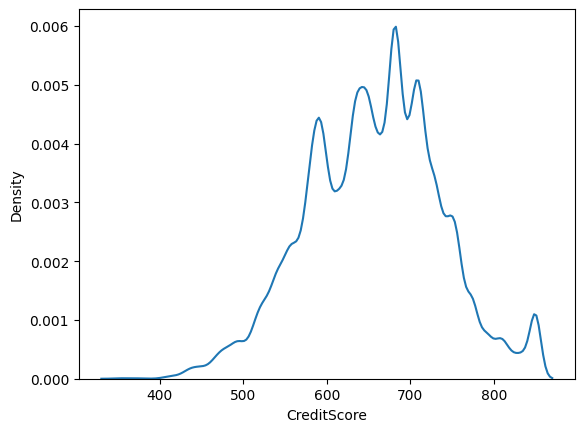

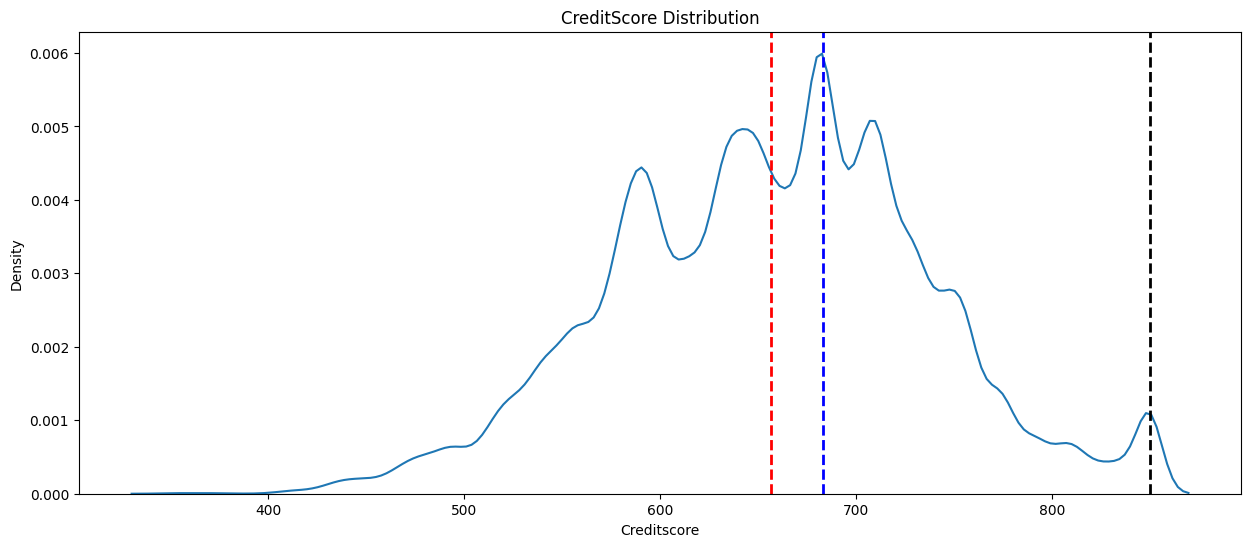

In [27]:
# Mean Credit Score
creditScore_mean = df['CreditScore'].mean()
print('Mean Value of CreditScore =',creditScore_mean)

# Maximum CreditScore
creditScore_max = df['CreditScore'].max()
print('Max Value of CreditScore =',creditScore_max)

# Maximum Density
max_density_index = np.argmax(sns.kdeplot(data=df, x='CreditScore').get_lines()[0].get_data()[1])
x_max_density = df['CreditScore'].iloc[max_density_index]
print('Max Density = ',x_max_density)


plt.figure(figsize =(15,6))
sns.kdeplot(data = df, x = 'CreditScore')
plt.axvline(creditScore_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {creditScore_mean}')
plt.axvline(creditScore_max, color='black', linestyle='dashed', linewidth=2, label=f'Max: {creditScore_max}')
plt.axvline(x_max_density, color='blue', linestyle='dashed', linewidth=2, label=f'Max Density: {x_max_density}')


plt.title('CreditScore Distribution')
plt.xlabel('Creditscore')

plt.show()

**Insighs from above chart**,
The KDE plot provides an overview of the distribution of credit scores, showcasing the shape and spread of the data.
- **Mean CreditScore (Red Line) at 656.48** The red dashed line represents the mean credit score. This line gives an indication of the central tendency of the distribution. It's around the point where the curve is symmetric.
- **Maximum CreditScore (Black Line) at 850** The black dashed line represents the maximum credit score in the dataset. It helps identify the highest value in the distribution.
- **Maximum Density Point (Blue Line) at 683** The blue dashed line denotes the point of maximum density in the KDE plot. It indicates where the distribution has the highest concentration of credit scores.

#### Chart - 2

### **Age Distribution**

Mean of Customers age = 38.1244147940245
Maximum age of Customers age = 92.0
Minimum age of Customers age = 18.0


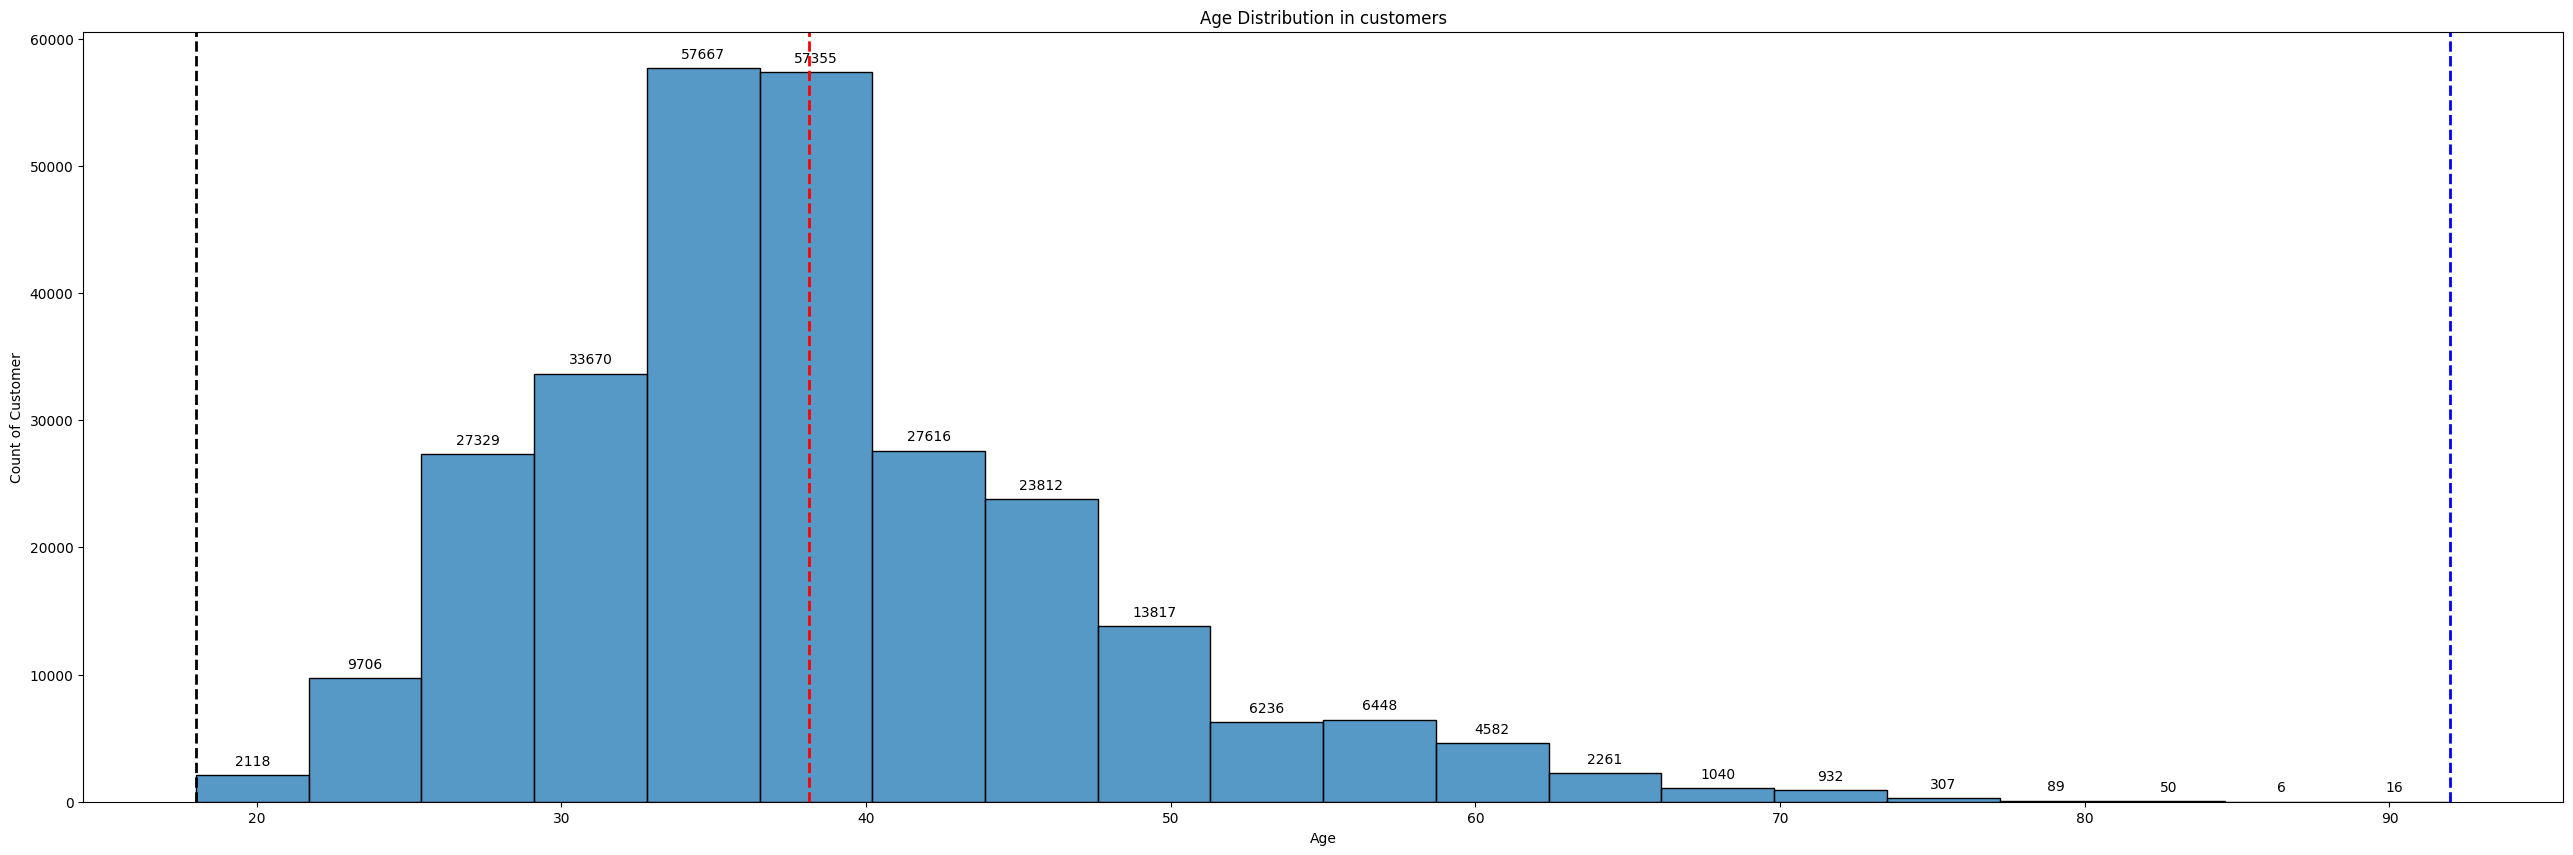

In [28]:
df['Age'].value_counts()

# Mean of age
age_mean = df['Age'].mean()
print('Mean of Customers age =',age_mean)

# Maximum Age of Customer
max_age = df['Age'].max()
print('Maximum age of Customers age =',max_age)

# Minimum Age of Customer
min_age = df['Age'].min()
print('Minimum age of Customers age =',min_age)

plt.figure(figsize =(32,10))
ax =sns.histplot(x = 'Age', data =df,bins=20)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Age Distribution in customers')
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean}')

plt.axvline(max_age,color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {max_age}')
plt.axvline(min_age,color='black', linestyle='dashed', linewidth=2, label=f'Mean: {min_age}')

plt.xlabel('Age')
plt.ylabel('Count of Customer')

plt.show()

**Insghts from age Distribution chart:**

- The age distribution of customers is right-skewed, with a peak around the late 30s.
- The mean age of customers is approximately 38.12.
- The maximum age of a customer is 92, indicated by the blue dashed line.The minimum age of a customer is 18, represented by the black dashed line.
- The chart shows the density or count of customers within different age ranges.The age groups with the highest counts seem to be between 30 and 40 years old.
-There are a few customers with ages significantly higher than the majority, which may be considered as outliers.

#### Chart - 3

### **Geographical Distribution**

Geography wise customer counts = France     157386
Spain       60126
Germany     57545
Name: Geography, dtype: int64


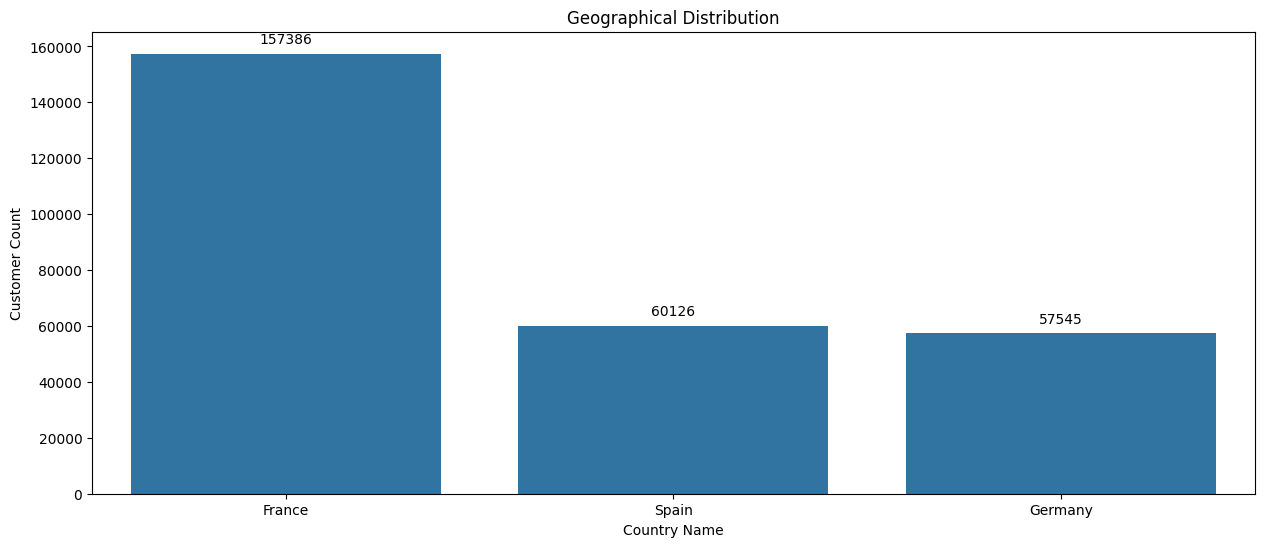

In [29]:
geograph_counts = df['Geography'].value_counts()
print('Geography wise customer counts =',geograph_counts)

plt.figure(figsize=(15,6))
ax = sns.countplot(x='Geography',  data = df)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Geographical Distribution')
plt.xlabel('Country Name')
plt.ylabel('Customer Count')
plt.show()

**Insights from Geographical distribution chart:**

- With a count of 157,386, France has the highest customer count among the three countries.
- Spain has 60,126 customers, and Germany has 57,545 customers. Both have significantly fewer customers compared to France.
- The countplot visually represents the differences in customer counts among the three countries. It's evident from the chart that France has a much larger customer base compared to Spain and Germany.

#### Chart - 4

### **Gender Distribution**

Male      155092
Female    119965
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender Distribution')

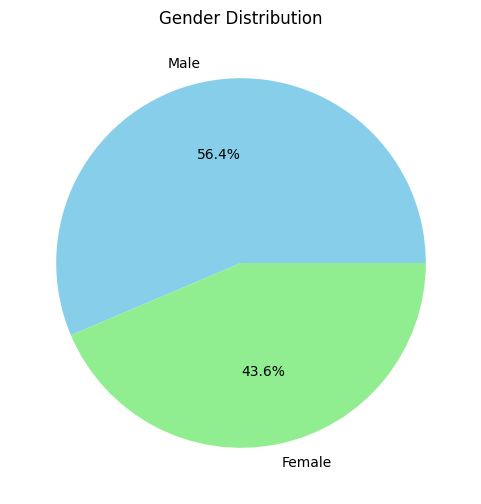

In [30]:
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)
plt.figure(figsize=(15,6))
plt.pie(gender_distribution.values,labels=gender_distribution.index,autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')

**Insights from Gender distribution:**
- Male count: 155,092 ,Female count: 119,965
- "Male" slice is labeled with 50.7%, it means that males make up 50.7% of the total dataset.
- You can observe whether there is an imbalance in the gender distribution by comparing the sizes of the "Male" and "Female" slices.

#### Chart - 5

### **Scatter Plot of Age vs. Balance**

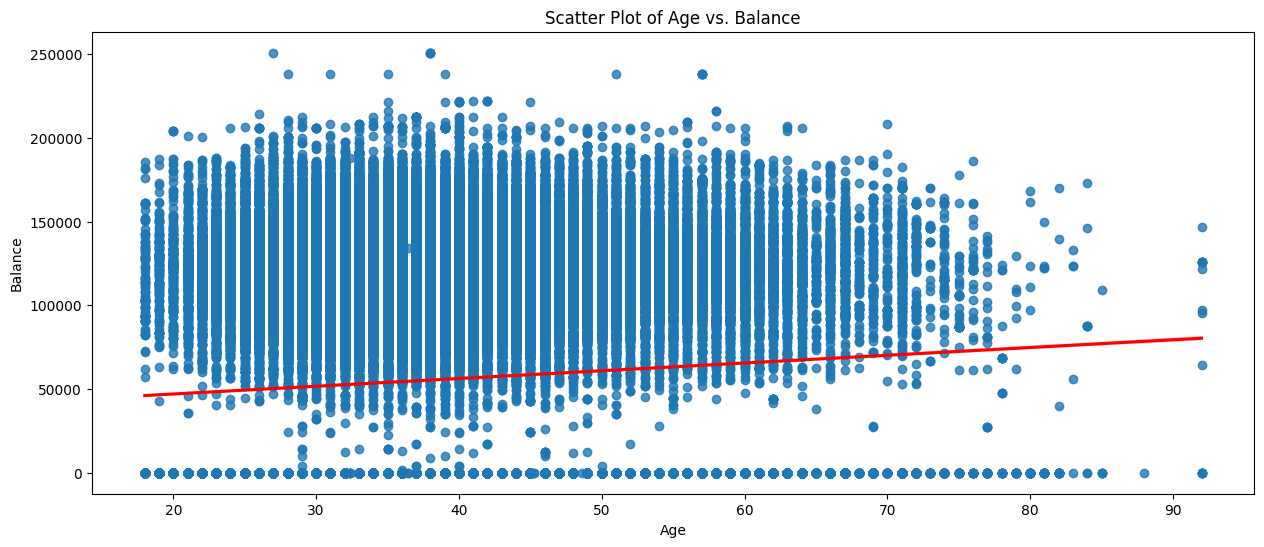

In [31]:
age_balance = df.groupby('Age')['Balance'].count()

plt.figure(figsize=(15,6))
sns.regplot(data=df,x='Age', y = 'Balance',scatter = True,line_kws=dict(color="r"))
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

**Insights from above chart,**

- The scatter plot and the regression line help visualize the overall trend between age and balance. It appears that there is a positive correlation, indicating that, on average, as age increases, the balance also tends to increase.
- The balance appears to increase with age initially, reaching higher values in the late 30s and 40s. After that, there seems to be some variability, with fluctuations in balance values as age increases.
- There's a noticeable decrease in balances for individuals aged 65 and above.Some age groups, especially at the extremes (e.g., 88, 92), have very low counts.

#### Chart - 6

### **Count Plot for Number of Products**

**NumOfProducts: The number of bank products the customer uses, indicating the extent of their relationship with the bank.**

Text(0.5, 1.0, 'Count Plot for Number of Products')

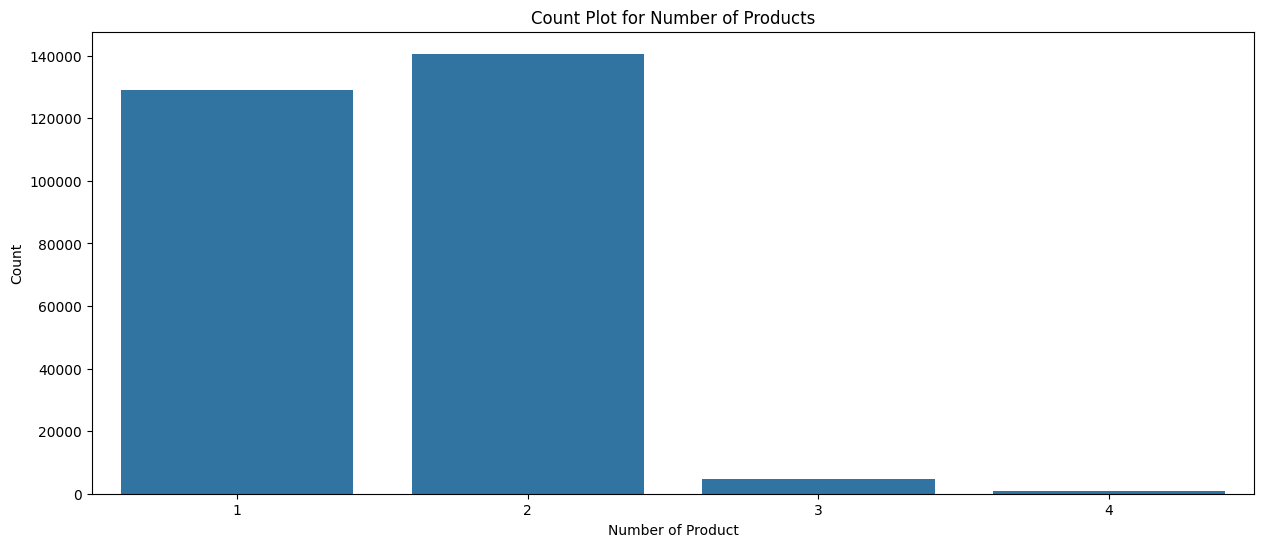

In [32]:
df['NumOfProducts'].value_counts()

plt.figure(figsize=(15,6))
sns.countplot(data=df,x='NumOfProducts')
plt.xlabel('Number of Product')
plt.ylabel('Count')
plt.title('Count Plot for Number of Products')

**Insights from above chart,**

- The highest count in the plot is for customers who have 2 bank products, with 140,629 occurrences.This suggests that a significant portion of the customer base is utilizing two different products offered by the bank.
- The second-highest count is for customers with only 1 bank product, totaling 128,941. While not as common as having 2 products, a substantial number of customers maintain a relationship with the bank through a single product.
- There are fewer customers who have 3 or 4 bank products. Only 4,708 customers have 3 products, and an even smaller group of 779 customers have 4 products.


#### Chart - 7
### **Geography vs CreditScore**



Text(0.5, 1.0, 'Geography vs CreditScore')

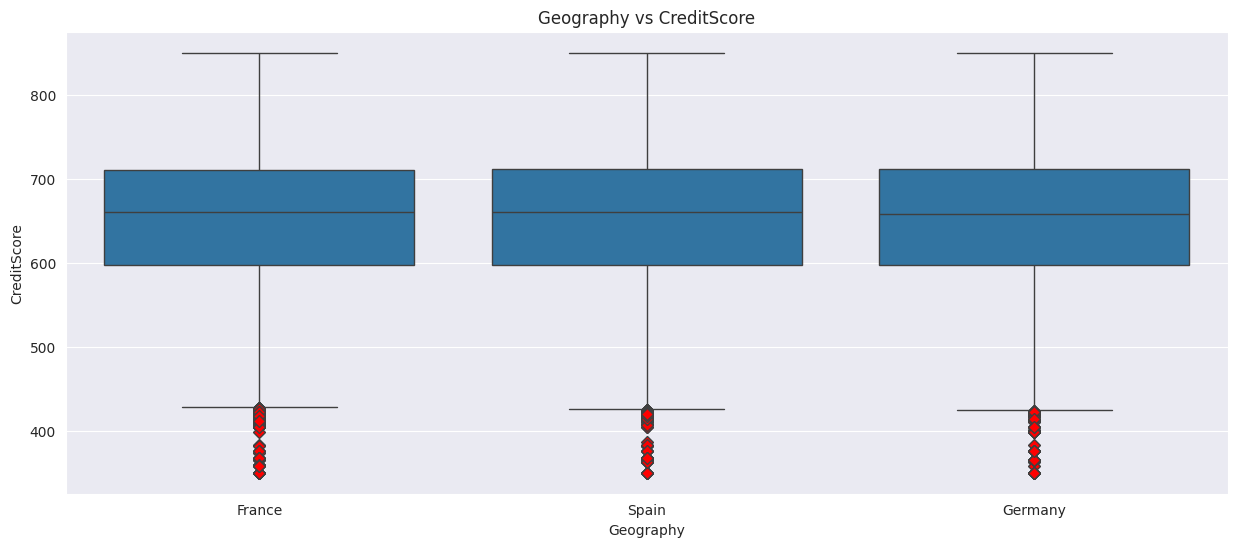

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Geography',y='CreditScore',flierprops=dict(markerfacecolor='red', marker='D'))
plt.xlabel('Geography')
plt.ylabel('CreditScore')
plt.title('Geography vs CreditScore')

**Insights from above chart,**
- The boxplot reveals that the median credit score for customers in Germany is slightly higher compared to those in France and Spain. This suggests that, on average, customers in Germany tend to have slightly higher credit scores
- Germany has a narrower interquartile range (IQR) compared to France and Spain. This indicates that the middle 50% of credit scores in Germany have less variability, suggesting a more concentrated distribution around the median
- Outliers, represented by red diamonds, are observed in all three countries. France appears to have a wider spread of credit scores, including more outliers. This suggests a greater variability in credit scores for customers in France compared to Germany and Spain.

#### Chart - 8
### **Tenure Distribution**



2     30392
7     29461
4     29361
8     28966
5     28796
1     27826
3     27773
9     27730
6     26426
10     9884
0      8442
Name: Tenure, dtype: int64


Text(0.5, 1.0, 'tenure_distribution')

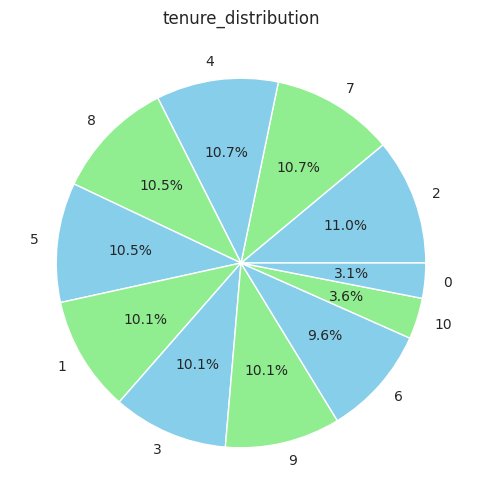

In [34]:
tenure_distribution = df['Tenure'].value_counts()
print(tenure_distribution)
plt.figure(figsize=(15,6))
plt.pie(tenure_distribution.values,labels=tenure_distribution.index,autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('tenure_distribution')

**Insights from above chart,**
- The most common tenure is 2 years, with 30,392 customers having this duration.
- There are no significant spikes or drops in the counts.
- There is a steady decline in the number of customers as the tenure increases, indicating that fewer customers have been with the bank for longer durations
- The bank has a substantial number of customers with tenures ranging from 1 to 5 years, suggesting a decent level of customer loyalty during these initial years

#### Chart - 8
### **Tenure Analysis**



Text(0.5, 1.0, 'Tenure and HasCred Analysis')

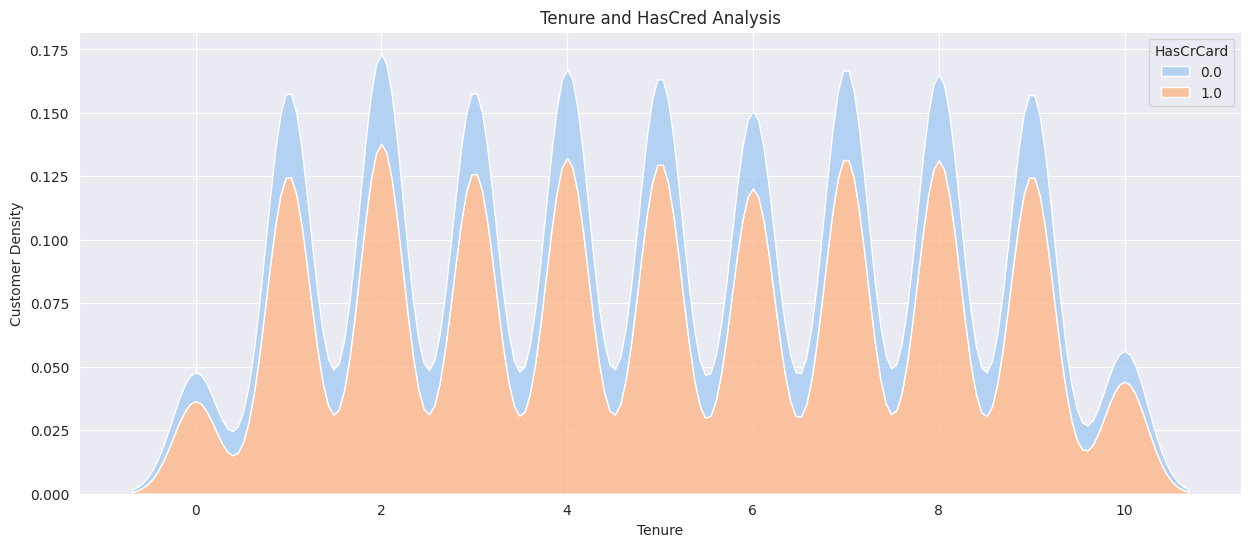

In [35]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df,x='Tenure',hue='HasCrCard',multiple="stack",palette='pastel')
plt.xlabel('Tenure')
plt.ylabel('Customer Density')
plt.title('Tenure and HasCred Analysis')

#### Chart - 8
### **EstimatedSalary vs Balance**



Text(0.5, 1.0, 'EstimatedSalary vs Balance')

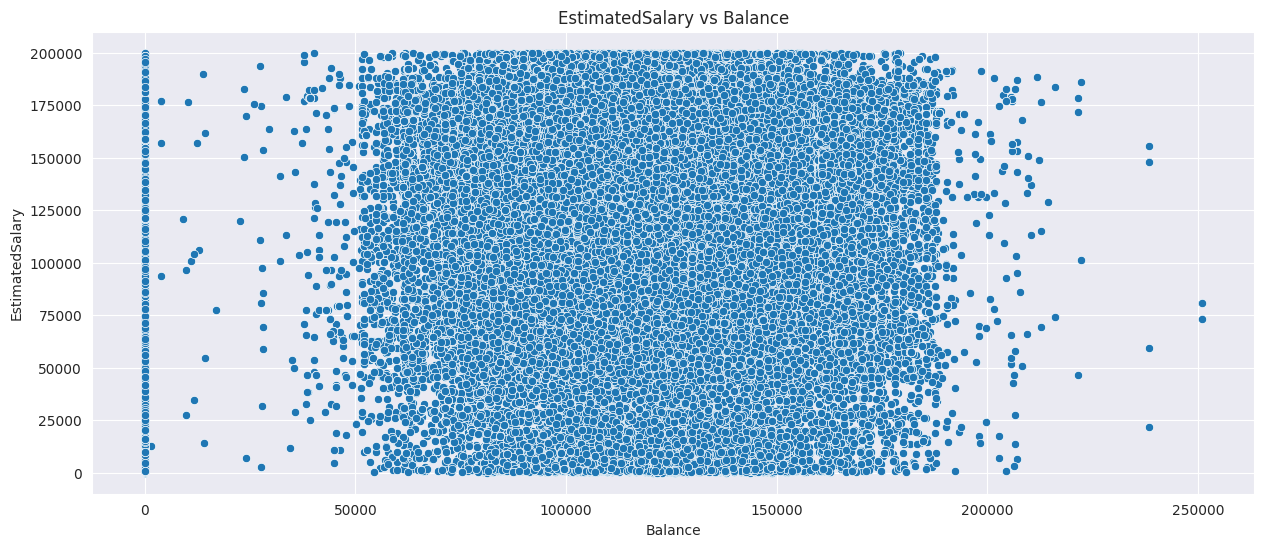

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Balance',y='EstimatedSalary',data=df)
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.title('EstimatedSalary vs Balance')

**Insights from above chart,**
- Based on the scatter plot, there doesn't seem to be a clear linear pattern or trend between Balance and EstimatedSalary.
- The lack of a distinct pattern suggests that there might be a weak or no correlation between the two variables.

#### Chart - 9
### **Geography vs EstimatedSalary**



Text(0.5, 1.0, 'Geography vs EstimatedSalary')

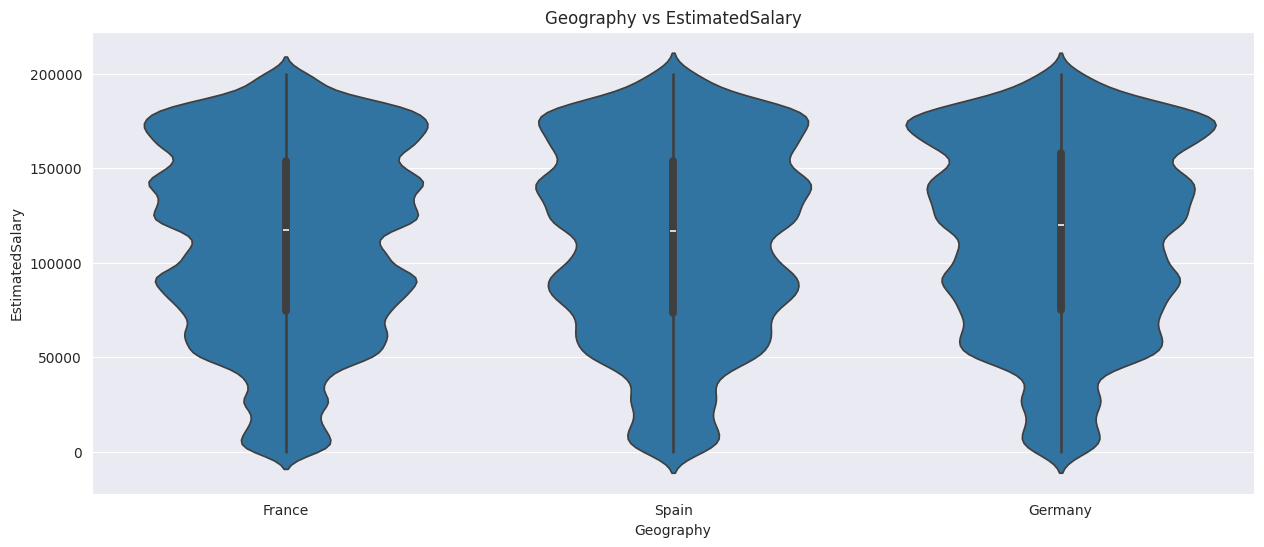

In [37]:
geo = df.groupby('Geography')['EstimatedSalary'].mean()
geo.describe()


plt.figure(figsize=(15,6))
sns.violinplot(data=df,x='Geography',y='EstimatedSalary')
plt.xlabel('Geography')
plt.ylabel('EstimatedSalary')
plt.title('Geography vs EstimatedSalary')

**Insights from above chart,**

- The mean estimated salary for all regions combined is approximately $112,627.48
- The violin plot allows us to observe the distribution of estimated salaries for each geography separately.
- The interquartile range (IQR), from the 25th to the 75th percentile, spans from approximately $111,989.99 to $113,060.55. This suggests that the middle 50% of estimated salaries falls within this range.
- A positively skewed distribution may indicate that some regions have higher estimated salaries than the mean, while a negatively skewed distribution may suggest lower estimated salaries.

#### Chart - 10
### **Geography vs EstimatedSalary**



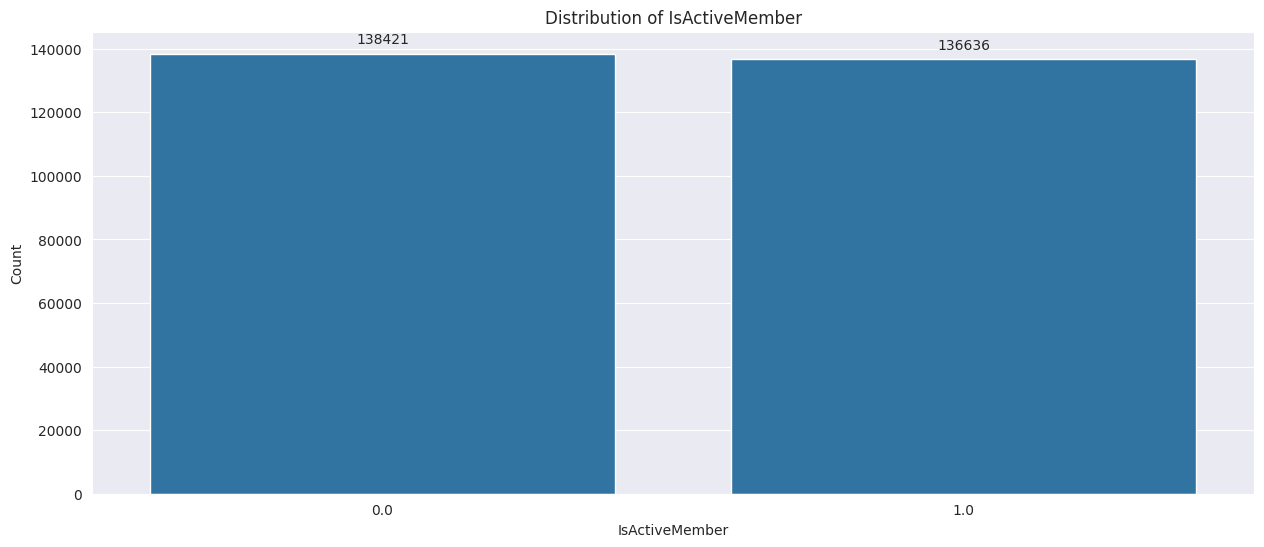

In [38]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='IsActiveMember', data=df)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Distribution of IsActiveMember')
plt.show()

**Insights from above chart,**
- There is a relatively balanced distribution between active and inactive members, with a slight difference in favor of inactive members.

## **Now will move towards the ML Models**



## **Before Moving further, For ML model our targated varibale is 'Exited' which is having 2 unique values which are Whether the customer has churned (1 = yes, 0 = no), the target variable indicating customer retention or attrition.**

## **In the 'Exited' column of the 'df' dataset, there are null values. Since this dataset is assumed to represent real-time data, filling NaNs with mean or median values might compromise the authenticity and meaning of the original data. To avoid this, the decision is made to drop NaNs from the 'Exited' column and proceed with building machine learning models.**

In [39]:
df = df.dropna(subset=['Exited'])

## **Will do EDA with target variables**

## **Exited vs. CreditScore**

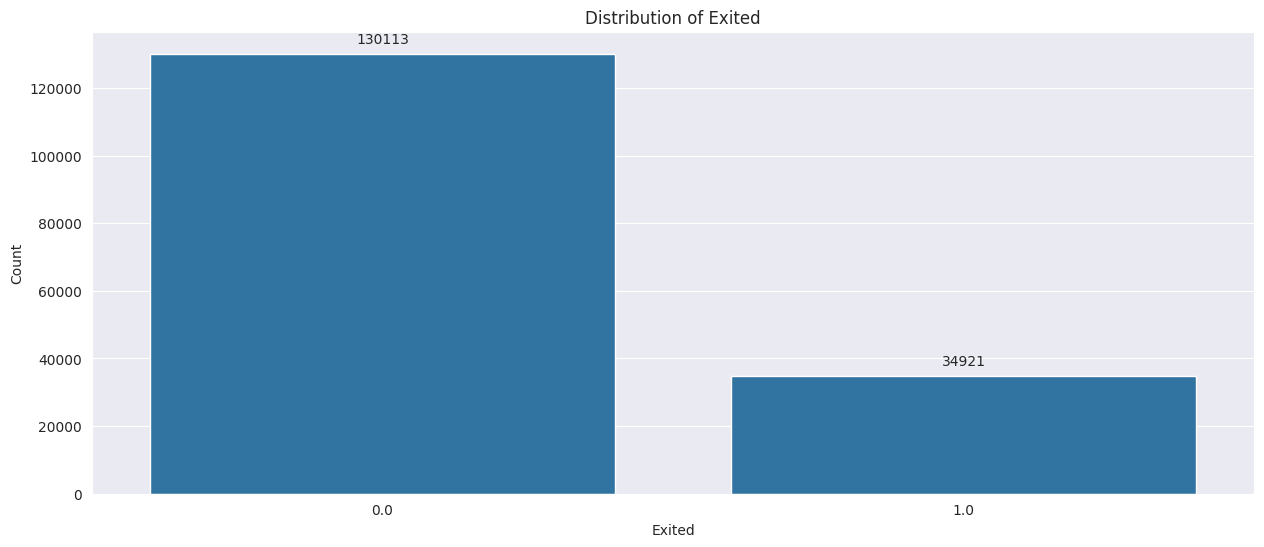

In [40]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data = df, x = 'Exited')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Exited')
plt.show()

**Insights from above chart,**
- The 'Exited' column show that there are 130,113 customers labeled as '0' (indicating no churn) and 34,921 customers labeled as '1' (indicating churn).
- The churn rate can be calculated as the number of customers who churned ('1') divided by the total number of customers. In this case, the churn rate is approximately 34,921 / (130,113 + 34,921) = 0.211 or 21.1%

## **Tenure vs Exited**

Exited    0.0   1.0
Tenure             
0        3731  1276
1       12970  3790
2       14529  3516
3       12820  3810
4       13580  3974
5       13468  3800
6       12677  3145
7       14469  3341
8       14052  3468
9       13165  3544
10       4652  1257


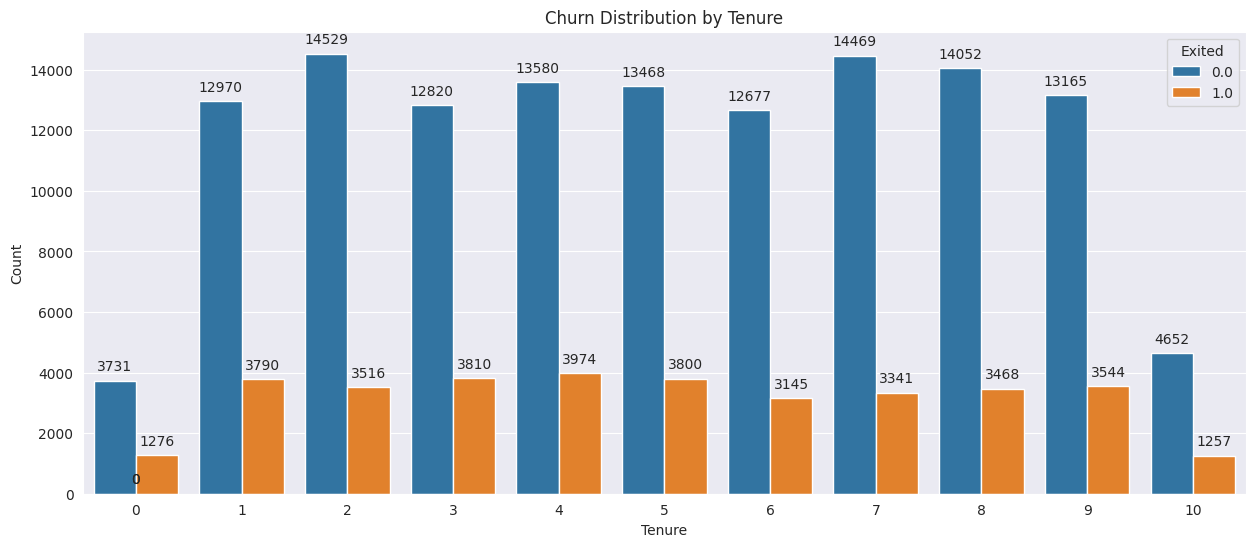

In [41]:
ten_exi = pd.crosstab(index=df['Tenure'],columns=df['Exited'])
print(ten_exi)

plt.figure(figsize=(15,6))
ax= sns.countplot(x='Tenure', hue='Exited', data=df)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Distribution by Tenure')
plt.show()

**Insights from above chart,**
- For the initial tenure periods (0 to 3), there seems to be a higher number of customers who have churned compared to those who have not.Tenure periods 0 and 1 have a particularly high churn count
- In the middle tenure periods (4 to 7), the churn counts seem to stabilize, with relatively consistent numbers of churned and retained customers.
- In the later tenure periods (8 to 10), there is some fluctuation in the churn counts, with a relatively higher number of retained customers in tenure 8
- The data suggests that the bank may need to focus on implementing retention strategies for customers in the early tenure periods to reduce churn

## **Churn Distribution by Geography**

Exited       0.0    1.0
Geography              
France     78643  15572
Germany    21492  13114
Spain      29978   6235


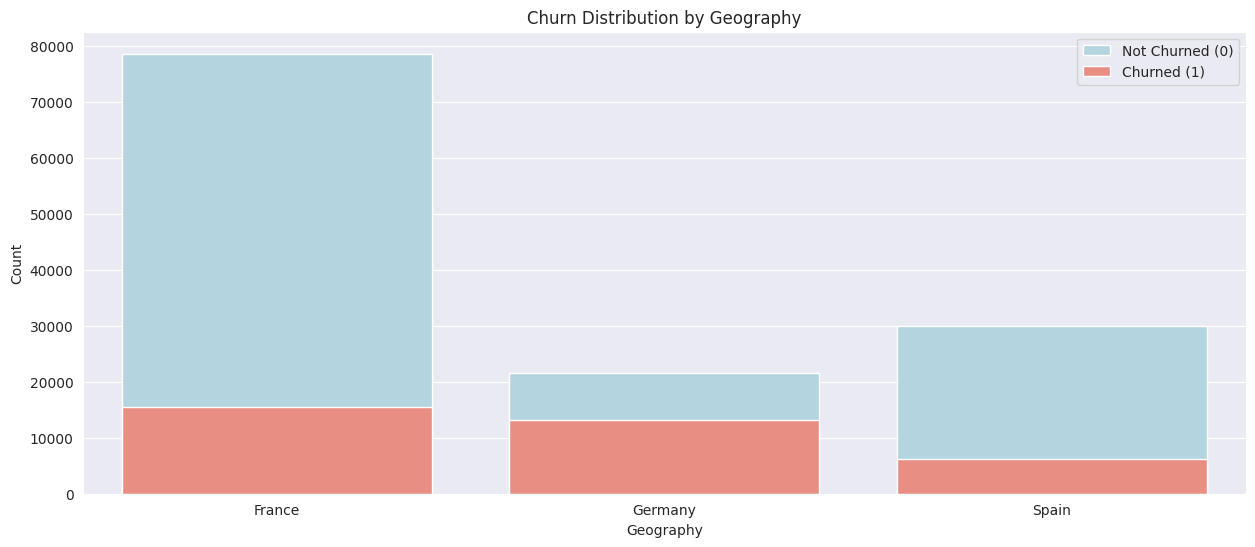

In [42]:
geo_exited = pd.crosstab(index=df['Geography'],columns=df['Exited'])

print(geo_exited)

plt.figure(figsize=(15,6))
sns.barplot(x=geo_exited.index, y=geo_exited[0], color='lightblue', label='Not Churned (0)')
sns.barplot(x=geo_exited.index, y=geo_exited[1], color='salmon', label='Churned (1)')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Churn Distribution by Geography')
plt.legend()

plt.show()

**Insights from above chart,**

- France has the highest overall churn count, followed by Spain and then Germany.Germany has the lowest overall churn count, indicating a relatively lower churn rate compared to France and Spain.
- The higher churn count in France suggests that the bank may need to focus on implementing retention strategies specific to the France.

## **Churn Distribution by IsActiveMember**

Exited            0.0    1.0
IsActiveMember              
0.0             58261  24624
1.0             71852  10297


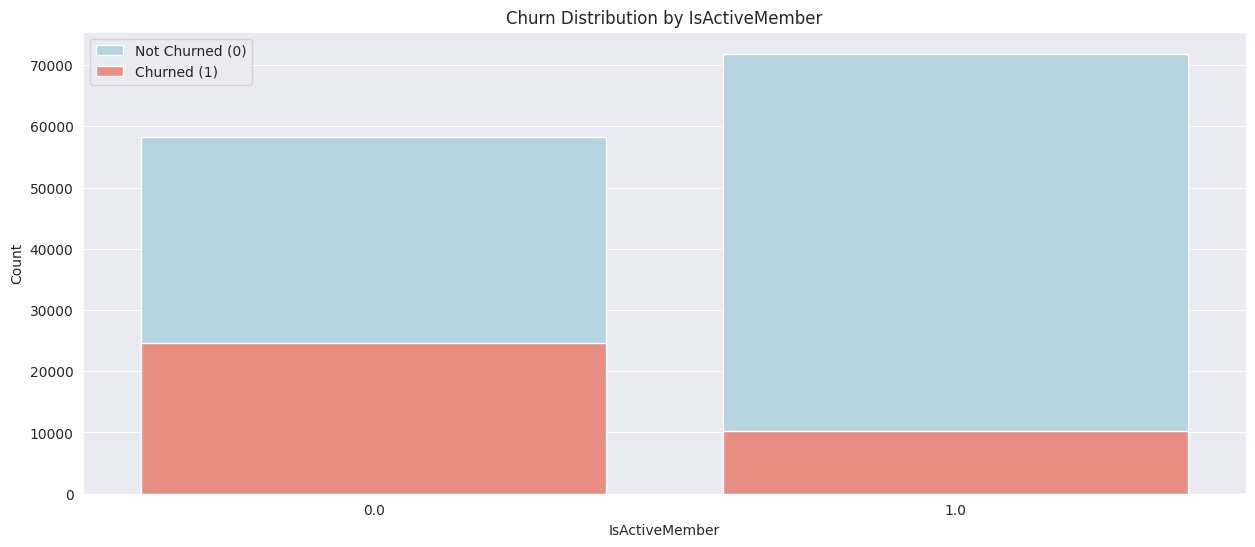

In [43]:
active_exited = pd.crosstab(index=df['IsActiveMember'],columns=df['Exited'])

print(active_exited)

plt.figure(figsize=(15,6))
sns.barplot(x=active_exited.index, y=active_exited[0], color='lightblue', label='Not Churned (0)')
sns.barplot(x=active_exited.index, y=active_exited[1], color='salmon', label='Churned (1)')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Churn Distribution by IsActiveMember')
plt.legend()

plt.show()

**Insights from above chart,**
- Customers who are not active members (IsActiveMember=0.0) have a higher churn count compared to active members (IsActiveMember=1.0)
- The data suggests that being an active member correlates with lower churn. Active members (IsActiveMember=1.0) have a higher count of not-churned customers (Exited=0.0) compared to inactive members
- The higher count of not-churned customers among active members indicates that the bank's retention strategies or services may be more effective for this group

### **Will do Encoding for Categoricle Features**

In [44]:
# Firstly will drop unnessary columns, which are not useful for ML Model, By observing dataset columns like 'id','CustomerId' and 'Surname' are unnessary

df.drop(columns=['id','Surname'],inplace=True)

In [45]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
# Encoding

# In Dataset We have categorical columns like 'Geography','Gender' for this have to do encoding

from sklearn.preprocessing import LabelEncoder

LabelEnco = LabelEncoder()

df['Geography'] = LabelEnco.fit_transform(df['Geography'])

df['Gender'] = LabelEnco.fit_transform(df['Gender'])

df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,15749177,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,15694510,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,15741417,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,15766172,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


## **Now, will check for Outliers**


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  int64  
 3   Gender           165034 non-null  int64  
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 16.4 MB


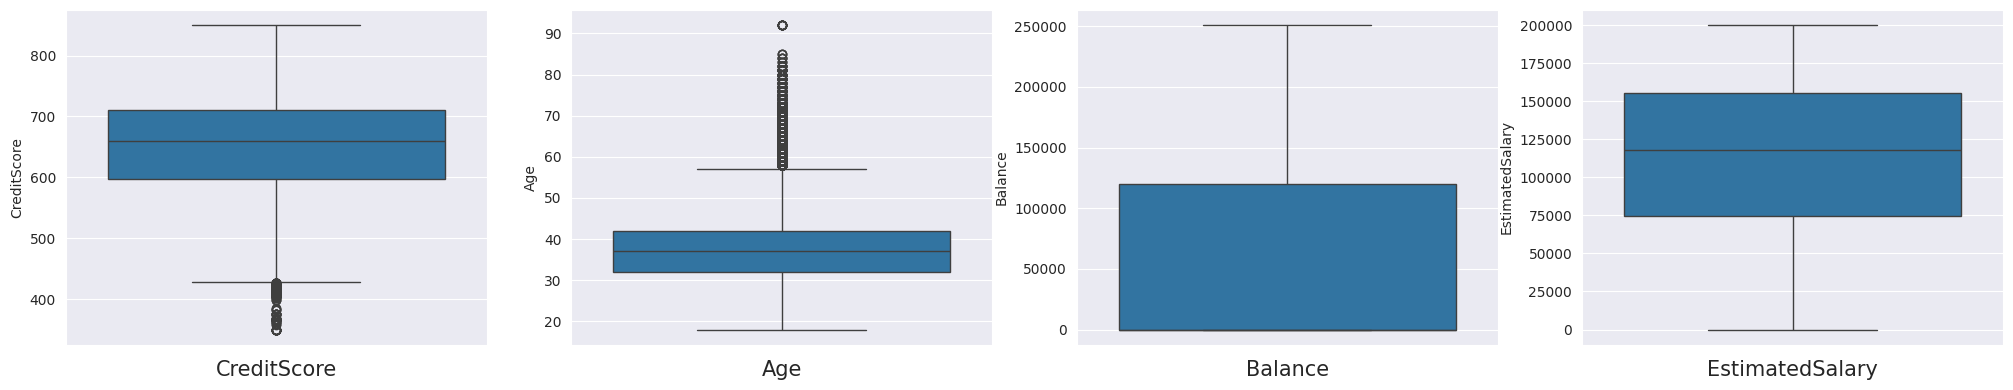

In [48]:
# In dataset many columns are categorical, will choose numerical columns for checking outliers.

numerical_columns = df[['CreditScore','Age','Balance','EstimatedSalary']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [49]:
# Will use z-score method for treating outliers

from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 1.8

# Numerical columns are as defined above

# Create a copy of the dataset for outlier treatment
no_outliers = df.copy()

for col in numerical_columns:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (132666, 12)


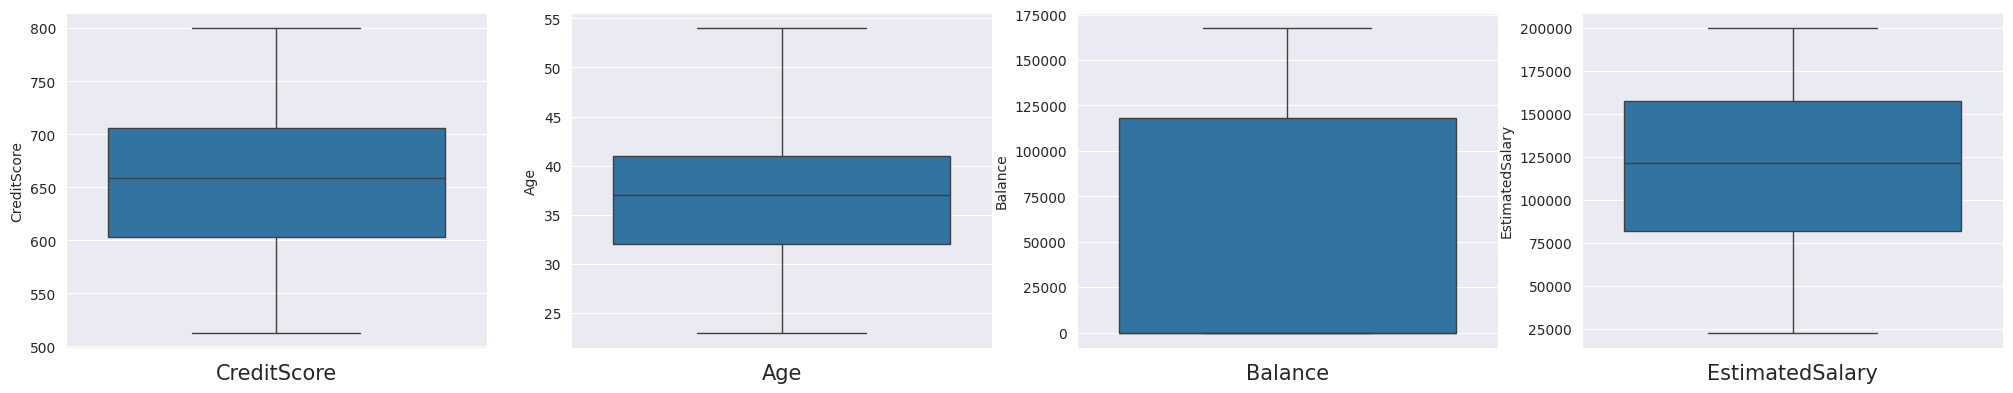

In [50]:
# In dataset many columns are categorical, will choose numerical columns for checking outliers.

numerical_columns = no_outliers[['CreditScore','Age','Balance','EstimatedSalary']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

<ipython-input-51-38bc872b9d89>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])  #sns.distplot(zomato_country_data[numerical_columns[i]])
<ipython-input-51-38bc872b9d89>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])  #sns.distplot

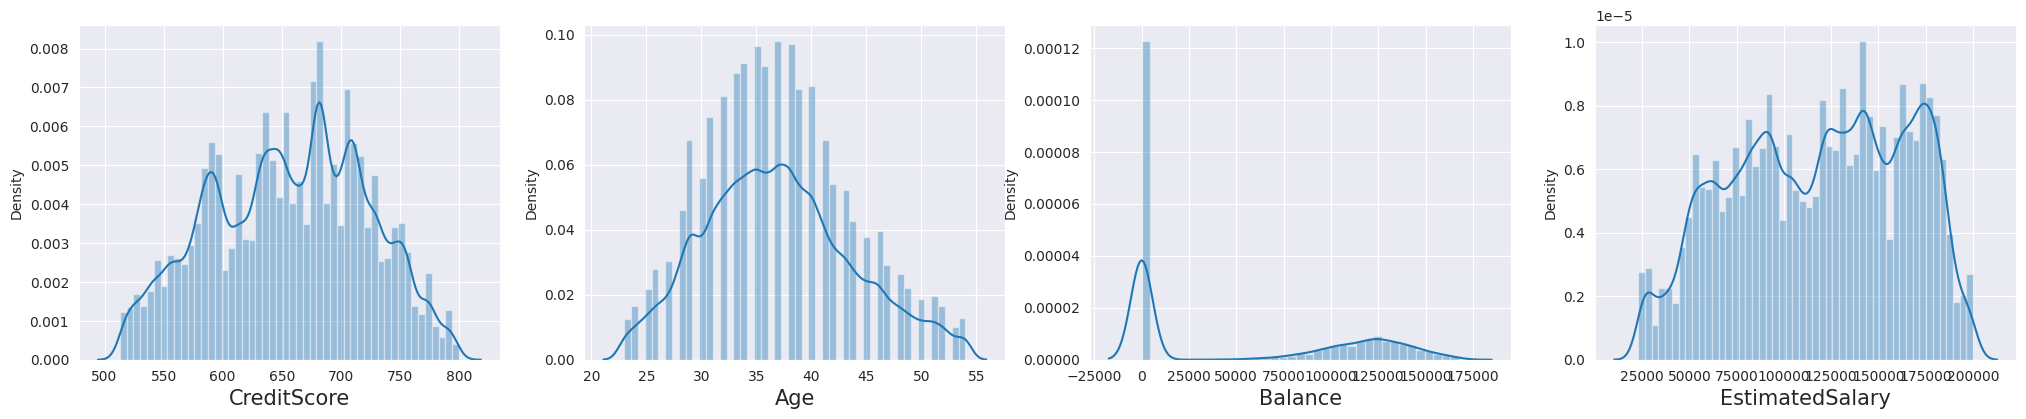

In [51]:
# Will check for Skewness

numerical_columns = no_outliers[['CreditScore','Age','Balance','EstimatedSalary']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.distplot(numerical_columns[column])  #sns.distplot(zomato_country_data[numerical_columns[i]])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

## **Heatmap and Correlation**

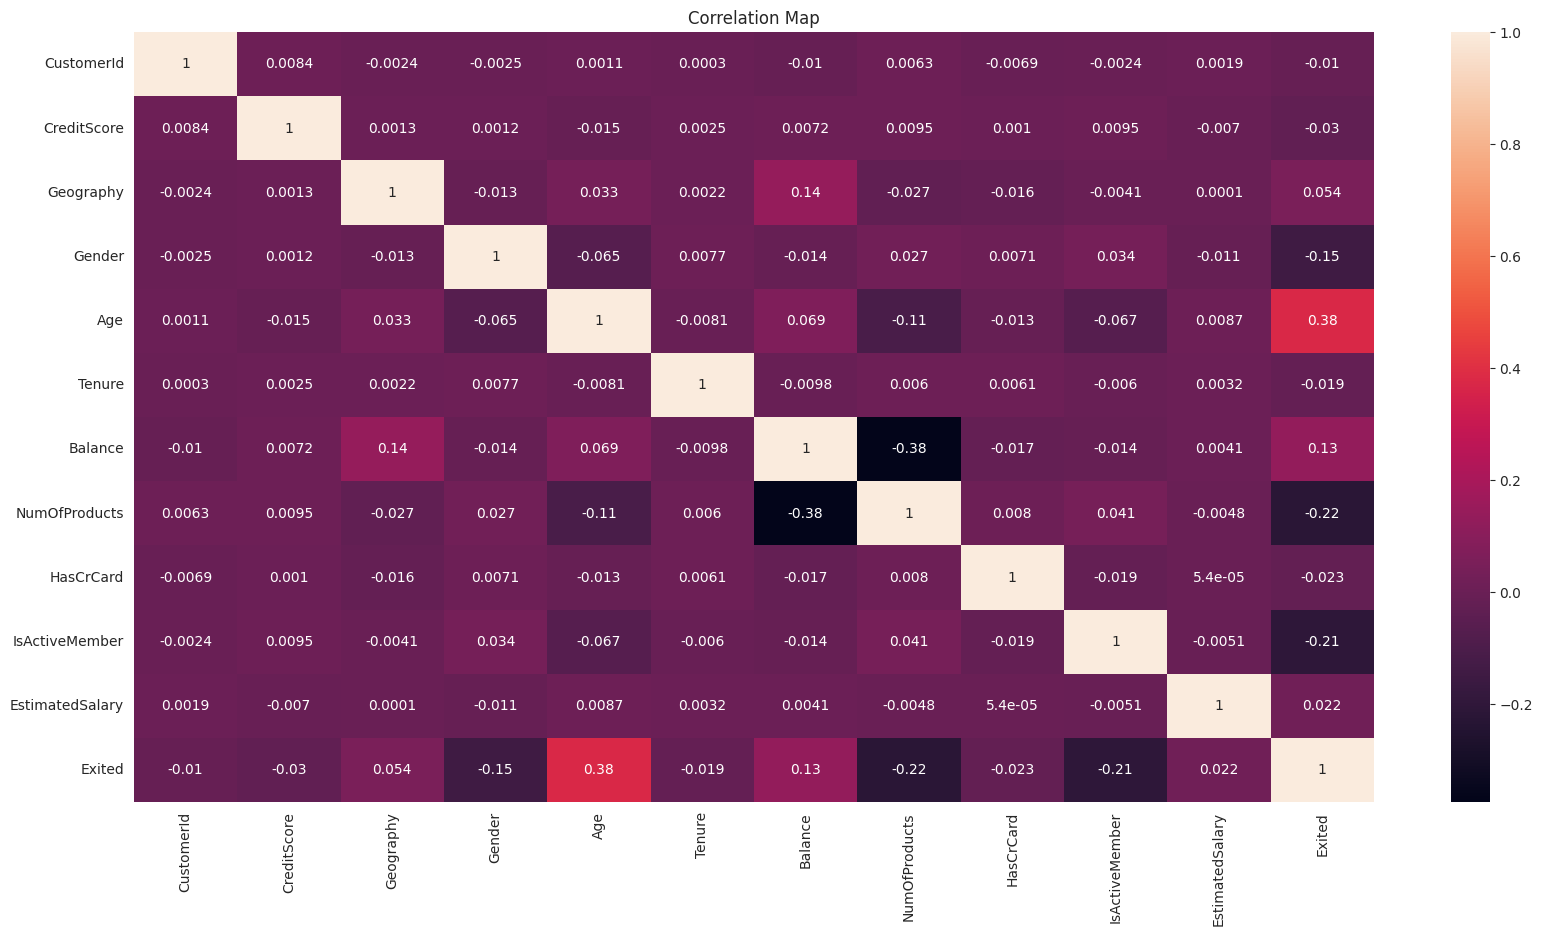

In [52]:
correlation_data = no_outliers

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Insights from above heatmap,**

- Notable correlations in the matrix include the positive correlation between "Age" and "Exited" (0.376), suggesting that older customers may have a higher likelihood of churning
- "Balance" and "NumOfProducts" have a strong negative correlation (-0.376), indicating that customers with more products tend to have lower balances.
- The correlation between "Gender" and "Exited" is -0.145, indicating a modest negative correlation. This suggests that gender has a slight impact on churn, with a negative correlation implying that females may have a slightly higher likelihood of churning compared to males
- "IsActiveMember" has a negative correlation of -0.205 with "Exited," indicating that active members are less likely to churn compared to inactive members

## **Checking for VIF**

In [53]:
# Will check for VIF of each column for correlation

x = no_outliers[['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.000256,CustomerId
1,1.000615,CreditScore
2,1.021767,Geography
3,1.005770,Gender
4,1.022338,Age
5,1.000318,Tenure
6,1.188802,Balance
7,1.177296,NumOfProducts
8,1.001156,HasCrCard
9,1.007074,IsActiveMember


## **As we can see, for any variable, if the VIF score is more than 5, there is no strong correlation between variables. Therefore, there is no need to drop any variable from the dataset.**


### ML Model - 1

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predicting on test set results
y_pred = log_reg.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(log_reg, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 200]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Logistic Regression after hypertuning model :",grid_search_cv.best_score_*100)

Logistic Regression
Accuracy score: 84.45979899497488
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     31976
         1.0       0.70      0.37      0.49      7824

    accuracy                           0.84     39800
   macro avg       0.78      0.67      0.70     39800
weighted avg       0.83      0.84      0.83     39800

Confusion matrix:
 [[30697  1279]
 [ 4906  2918]]




Cross Validation Scores: [81.1675586  80.88795085 81.11408435 81.00478649 81.27991558]


Best Parameters for hypertuning Parameters : {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression after hypertuning model : 84.43671650061081


**Insights from Logistic Regression Model :**

- **The overall accuracy of the model is approximately 84.46%.** This indicates the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances.
- **For the positive class (1.0), the precision is 0.70, suggesting that when the model predicts a positive outcome, it is correct approximately 70% of the time.**
The recall for the positive class is 0.37, indicating that the model correctly identifies 37% of the actual positive instances.
- True Positives (TP): 2,918 instances were correctly predicted as positive.

  True Negatives (TN): 30,697 instances were correctly predicted as negative.

  False Positives (FP): 1,279 instances were incorrectly predicted as positive.

  False Negatives (FN): 4,906 instances were incorrectly predicted as negative.

- The best hyperparameters for the logistic regression model after hypertuning are provided. The chosen parameters are **{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}**.**The corresponding best score after hyperparameter tuning is 84.44%, which is slightly lower than the initial accuracy**


### ML Model - 2

#### K Neighbors Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = knn_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("K Neighbors Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(knn_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_knn = {
    'n_neighbors': [3,7],
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
    'leaf_size': [20,30],
    'p': [1, 2]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Classifier after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Classifier
Accuracy score: 85.12814070351759
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     31976
         1.0       0.66      0.49      0.57      7824

    accuracy                           0.85     39800
   macro avg       0.77      0.72      0.74     39800
weighted avg       0.84      0.85      0.84     39800

Confusion matrix:
 [[30011  1965]
 [ 3954  3870]]




Cross Validation Scores: [77.31966534 77.24343271 77.18313044 77.07006369 77.337655  ]


Best Parameters for hypertuning Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best Score for K Neighbors Classifier after hypertuning model : 85.37139574287058


**Insights from K Neighbors Classifier Model:**

- **The accuracy score of 85.13% indicates the overall correctness of the model's predictions.**It is the ratio of correctly predicted instances to the total instances.
- **Precision for class '0.0' is high (88%), suggesting that when the model predicts '0.0', it is often correct.Recall for class '1.0' is lower (49%), indicating that the model doesn't capture all instances of '1.0', leading to false negatives.**
- True Positive (TP): 3870 This is the number of instances where the model correctly predicted '1.0' (positive class).

  True Negative (TN): 30011 This is the number of instances where the model correctly predicted '0.0' (negative class).

  False Positive (FP): 1965 This is the number of instances where the model incorrectly predicted '1.0' when the true label was '0.0' (Type I error).

  False Negative (FN): 3954 This is the number of instances where the model incorrectly predicted '0.0' when the true label was '1.0' (Type II error).

- **Best Score for K Neighbors Classifier after hypertuning model 85.37**The hyperparameter tuning results provide the best set of parameters for the K Neighbors Classifier.**Best Parameters for hypertuning Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}**

### ML Model - 3

#### SVC

In [ ]:
from sklearn.svm import SVC

# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = svc_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("SVC classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(svc_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for SVC Classifier after hypertuning model :",grid_search_cv.best_score_*100)

**Insights from SVC Model,**

- The overall accuracy of the model is 86.70%, suggesting that it correctly predicted the target variable for 86.70% of the samples in the dataset.
- For class '0' (not-churned), the precision is high (88%), indicating that when the model predicts a customer will not churn, it is correct 88% of the time.The recall for class '0' is also high (97%), suggesting that the model captures 97% of the actual not-churned cases.
- True Positive (TP): 3499
The number of instances where the model correctly predicted positive (churned) cases.
  
  True Negative (TN): 31009 The number of instances where the model correctly predicted negative (not-churned) cases.

  False Positive (FP): 967 The number of instances where the model incorrectly predicted positive cases (predicted churned when the actual is not-churned).

  False Negative (FN): 4325 The number of instances where the model incorrectly predicted negative cases (predicted not-churned when the actual is churned).

- The hyperparameter tuning results show that the best parameters for the SVC model are **{'C': 10, 'kernel': 'rbf'}**.

### ML Model - 4

#### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
Decision_tress = DecisionTreeClassifier()
Decision_tress.fit(x_train, y_train)

# Predicting on test set results
y_pred = Decision_tress.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(Decision_tress, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['entropy'],
    'max_depth': [5,20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Classifier
Accuracy score: 80.74120603015076
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     31976
         1.0       0.51      0.52      0.52      7824

    accuracy                           0.81     39800
   macro avg       0.70      0.70      0.70     39800
weighted avg       0.81      0.81      0.81     39800

Confusion matrix:
 [[28035  3941]
 [ 3724  4100]]




Cross Validation Scores: [80.57586493 80.49221724 80.48467946 80.74096408 80.465835  ]


Best Parameters for hypertuning Parameters : {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score for Decision Tree Classifier after hypertuning model : 85.12264106679852


**Insights from Decision Tree Classifier Model,**
- **The overall accuracy of the model is approximately 80.65%,** suggesting that the model correctly predicted the target variable for 80.65% of the instances.
- **The precision for class '0.0' is relatively high (0.88), indicating a low false positive rate. However, the precision for class '1.0' is lower (0.51)**, indicating a higher false positive rate for predicting churn.The recall for class '0.0' is also high (0.88), suggesting that the model captures a significant portion of instances of class '0.0'. The recall for class '1.0' is lower (0.52), indicating that the model misses some instances of class '1.0'.

- True Positives (TP): 4092 These are instances where the model correctly predicted class '1.0' (churned). These are customers who actually churned, and the model identified them correctly.
  
  True Negatives (TN): 28006 These are instances where the model correctly predicted class '0.0' (not churned). These are customers who did not churn, and the model identified them correctly.

  False Positives (FP): 3970 These are instances where the model incorrectly predicted class '1.0' (churned), but the actual class is '0.0' (not churned). These are also known as Type I errors or false alarms.

  False Negatives (FN): 3732 These are instances where the model incorrectly predicted class '0.0' (not churned), but the actual class is '1.0' (churned). These are also known as Type II errors or misses.

- **The best score after hyperparameter tuning improved to 85.01%**.The hyperparameter tuning process resulted in the best parameters for the Decision Tree Classifier:**'criterion':'entropy'
'max_depth':5
'max_features':'log2'
'min_samples_leaf':4
'min_samples_split':5**

### ML Model - 5

#### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = rand_forest.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(rand_forest, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['entropy'],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Random Forest Classifier after hypertuning model :",grid_search_cv.best_score_*100)

KeyboardInterrupt: 

**Insights from Random Forest Classifier Model**

- The overall accuracy of the model is 86.53%
- The precision for predicting class '0.0' is high (89%), suggesting that when the model predicts a customer will not churn, it is correct 89% of the time. The precision for predicting class '1.0' is lower (72%).The recall for predicting class '0.0' is high (95%), indicating that the model captures 95% of the actual '0.0' instances. The recall for predicting class '1.0' is lower (52%).
- True Positives (TP): 4063 These are instances where the model correctly predicted that customers would churn (class '1.0').

  True Negatives (TN): 30375 These are instances where the model correctly predicted that customers would not churn (class '0.0').

  False Positives (FP): 1601 These are instances where the model incorrectly predicted that customers would churn when they did not.

  False Negatives (FN): 3761 (Type II error) These are instances where the model incorrectly predicted that customers would not churn when they did.

- The best score after hyperparameter tuning improved to 87.07%.**Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}**

### ML Model - 6

#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gboost.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(gboost, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Gradient Boosting Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Classifier
Accuracy score: 86.97738693467336
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     31976
         1.0       0.75      0.51      0.61      7824

    accuracy                           0.87     39800
   macro avg       0.82      0.73      0.76     39800
weighted avg       0.86      0.87      0.86     39800

Confusion matrix:
 [[30608  1368]
 [ 3815  4009]]




Cross Validation Scores: [87.29554534 86.9483285  87.27999095 86.82772397 87.21215091]




**Insights from Gradient Boosting Classifier Model:**

- The overall accuracy of your model is 86.98%, which indicates the proportion of correctly classified instances out of the total.
- For class 0 (not churned), precision is high (0.89), recall is also high (0.96), and F1-score is 0.92, indicating good performance.For class 1 (churned), precision is moderate (0.75), recall is moderate (0.51), and F1-score is 0.61, suggesting room for improvement in identifying churned instances.
- True Positives (TP): 4009 These are instances correctly predicted as "churned" (class 1).

  True Negatives (TN): 30608 These are instances correctly predicted as "not churned" (class 0).

  False Positives (FP): 1368 These are instances incorrectly predicted as "churned" when they are actually "not churned." Also known as Type I errors.

  False Negatives (FN): 3815 These are instances incorrectly predicted as "not churned" when they are actually "churned."

- The best score after hyperparameter tuning improved to 87.26%.The best hyperparameters found through hyperparameter tuning include **learning_rate=0.1, max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, and n_estimators=200**


### ML Model - 7

#### Extra Trees Classifier

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesClassifier()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Extra Trees Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(extra_tree, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [50, 100],
    'max_depth': [10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid_et, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Classifier
Accuracy score: 86.24371859296483
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     31976
         1.0       0.70      0.52      0.60      7824

    accuracy                           0.86     39800
   macro avg       0.80      0.73      0.76     39800
weighted avg       0.85      0.86      0.85     39800

Confusion matrix:
 [[30240  1736]
 [ 3739  4085]]




Cross Validation Scores: [86.4249642  85.84027438 86.37545698 85.92318999 86.12671013]


Best Parameters for hypertuning Parameters : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Extra Trees Classifier after hypertuning model : 86.73034213949859


**Insights from Extra Trees Classifier,**

- **The overall accuracy of the model on the test set is 86.24%.**
- Precision for class 1.0 is 0.70, which indicates the proportion of predicted positives that were actually positive. Recall (sensitivity) is 0.52, representing the proportion of actual positives that were correctly predicted.
- True Positives :The model correctly predicted 4,066 instances as churned when they were actually churned.
  
  True Negatives: The model correctly predicted 30,250 instances as not churned when they were actually not churned.

  False Positives: The model incorrectly predicted 1,726 instances as churned when they were not actually churned.

  False Negatives: The model incorrectly predicted 3,758 instances as not churned when they were actually churned.
- **The accuracy of the model has improved after hyperparameter tuning, reaching a score of 86.73%**. The best parameters for the Extra Trees Classifier include a **max depth of 10, max features set to 'sqrt', minimum samples leaf of 1, minimum samples split of 2, and 100 estimators**

### ML Model - 8

#### AdaBoost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier


# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

# Predicting on test set results
y_pred = adaboost.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("AdaBoost Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(adaboost, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid_adaboost, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for AdaBoost Classifier after hypertuning model :",grid_search_cv.best_score_*100)

AdaBoost Classifier
Accuracy score: 86.61557788944724
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     31976
         1.0       0.73      0.50      0.59      7824

    accuracy                           0.87     39800
   macro avg       0.81      0.73      0.76     39800
weighted avg       0.86      0.87      0.86     39800

Confusion matrix:
 [[30568  1408]
 [ 3919  3905]]




Cross Validation Scores: [86.90359539 86.722195   86.9897863  86.48098594 86.74857724]


Best Parameters for hypertuning Parameters : {'learning_rate': 1.0, 'n_estimators': 100}
Best Score for AdaBoost Classifier after hypertuning model : 86.86602406803496


**Insights from AdaBoost Classifier Model:**

- **The model achieves an accuracy of 86.61%**, indicating the proportion of correctly classified instances.
- Precision, recall, and F1-score are reported for both classes (0.0 and 1.0). Pay attention to the trade-off between precision and recall, especially in imbalanced datasets.Class 0.0 has higher precision, recall, and F1-score compared to Class 1.0, suggesting better performance in predicting the majority class.
- True Positives (TP): 30,568 Instances where the model correctly predicted Class 0.0 (no churn).

  False Positives (FP): 1,408 Instances where the model incorrectly predicted Class 1.0 (churn) when the true class was Class 0.0.

  True Negatives (TN): 3,905 Instances where the model correctly predicted Class 1.0 (churn).

  False Negatives (FN): 3,919 Instances where the model incorrectly predicted Class 0.0 (no churn) when the true class was Class 1.0.

- **The best cross-validated score after hyperparameter tuning is 86.87%.**The best hyperparameters obtained through hyperparameter tuning are a **learning rate of 1.0 and 100 estimators (trees)**

### ML Model - 9

#### Bagging Classifier

In [63]:
from sklearn.ensemble import BaggingClassifier


# Defining x and y variable

x = no_outliers[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

y = no_outliers['Exited']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
Bagg_class = BaggingClassifier()
Bagg_class.fit(x_train, y_train)

# Predicting on test set results
y_pred = Bagg_class.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Bagging Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(Bagg_class, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_bagging = {
    'n_estimators': [10, 50],
    'max_samples': [0.5,1.0],
    'max_features': [0.5,1.0],
    'bootstrap': [True, False]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(BaggingClassifier(), param_grid=param_grid_bagging, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Bagging Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Bagging Classifier
Accuracy score: 85.45226130653266
Classifiction report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     31976
         1.0       0.68      0.49      0.57      7824

    accuracy                           0.85     39800
   macro avg       0.78      0.72      0.74     39800
weighted avg       0.84      0.85      0.85     39800

Confusion matrix:
 [[30185  1791]
 [ 3999  3825]]




Cross Validation Scores: [85.75789553 84.99604266 85.52368748 85.470923   85.42192741]


Best Parameters for hypertuning Parameters : {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Best Score for Bagging Classifier after hypertuning model : 86.45683140160729


**Insights from Bagging Classifier Model,**

- The model achieves an accuracy score of approximately 85.35%
- Precision (positive predictive value): 0.68 for class 1. This indicates that among the predicted positive cases, approximately 68% are true positives.Recall (sensitivity or true positive rate): 0.49 for class 1. This suggests that the model captures approximately 49% of the actual positive cases.
- True Negative (TN): 30,171 These are instances where the model correctly predicted that customers did not churn (class 0).

  False Positive (FP): 1,805 These are instances where the model incorrectly predicted that customers churned (class 1), but they did not.

  False Negative (FN): 4,024 These are instances where the model incorrectly predicted that customers did not churn, but they did.

  True Positive (TP): 3,800 These are instances where the model correctly predicted that customers churned.

- The best cross-validated score after hyperparameter tuning improved to **86.46%**,Best Parameters for hypertuning Parameters **{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50, 'random_state': 42}**

# **Clustering**

[[-0.23912595  0.14413459 -0.79422926 ... -0.99555021  1.36948561
  -0.51806349]
 [ 0.80075494 -0.36770579 -0.79422926 ...  1.00446968 -1.25408471
  -0.51806349]
 [ 0.03508495  0.2689737  -0.79422926 ... -0.99555021  1.4374223
  -0.51806349]
 ...
 [-0.38170777 -1.14170832 -0.79422926 ...  1.00446968  0.2953656
  -0.51806349]
 [-0.03348879 -1.27903135  1.65503511 ...  1.00446968 -0.82321653
  -0.51806349]
 [ 0.57134947  2.41620652 -0.79422926 ... -0.99555021 -1.01392487
   1.93026533]]
[768118886754573.5, 298889724747527.0, 186239535347116.88, 98671062735931.97, 79552323831557.1, 63642013502220.516, 54303223985169.04, 46184075456785.19, 39793141156045.125, 34556984907411.617]


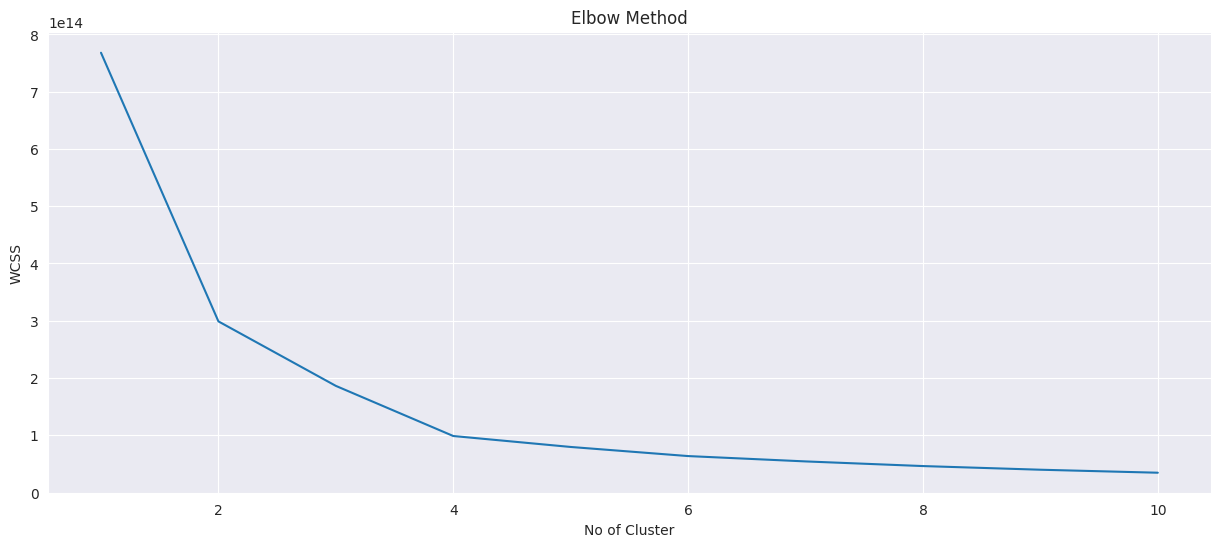

In [65]:
new_x = df[['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
main_df_new = scaler.fit_transform(new_x)
print(main_df_new)
df1 = pd.DataFrame(main_df_new)

from sklearn.cluster import KMeans

wcss=[]  # WCSS Empty list

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


print(wcss)

# Plottting Elbow chart for claring understanding
plt.figure(figsize=(15,6))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

**From the above elbow chart, it is evident that beyond k=4, the elbow of the curve remains relatively flat. Therefore, considering the point where k=4 provides a reasonable choice**

In [66]:
# Fitting fpor k-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state = 100)

kmeans.fit(new_x)

y_kmeans = kmeans.fit_predict(df1)

y_kmeans

# By Default clusering will start with 0, but for simplicity will start with 1

y_kmeans1=y_kmeans+1

formed_cluster = list(y_kmeans1)

df['formed_cluster'] = formed_cluster

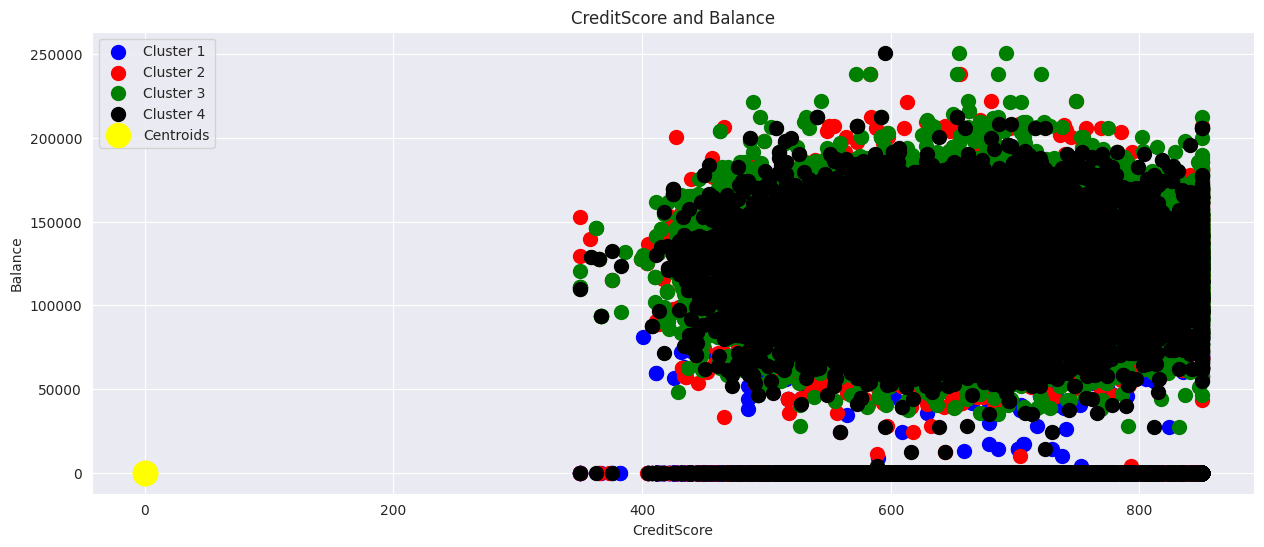

In [67]:
plt.figure(figsize=(15, 6))

plt.scatter(new_x[y_kmeans1 == 1]['CreditScore'], new_x[y_kmeans1 == 1]['Balance'], s=100, c='blue', label='Cluster 1')
plt.scatter(new_x[y_kmeans1 == 2]['CreditScore'], new_x[y_kmeans1 == 2]['Balance'], s=100, c='red', label='Cluster 2')
plt.scatter(new_x[y_kmeans1 == 3]['CreditScore'], new_x[y_kmeans1 == 3]['Balance'], s=100, c='green', label='Cluster 3')
plt.scatter(new_x[y_kmeans1 == 4]['CreditScore'], new_x[y_kmeans1 == 4]['Balance'], s=100, c='black', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('CreditScore and Balance')
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.savefig('clusterscatter.jpg')  # Save the figure if needed
plt.legend()
plt.show()


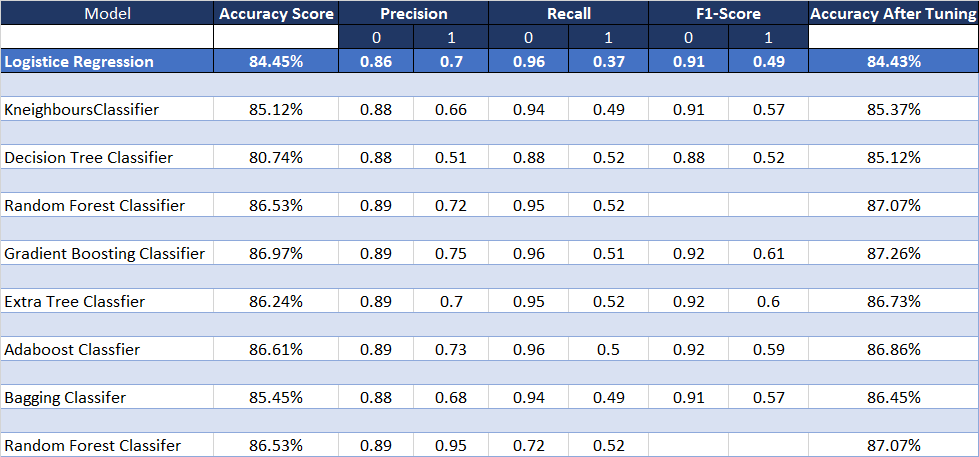

# **Thank You**